In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.columns = ['Credit Policy', 'Loan Purpose', 'Interest Rate', 'Installment', 'Annual Income Log Report', 
                'Debt to Income Ratio', 'FICO Score', 'Days with Credit Line', 'Revolving balance', 'Revolving utilization rate', 
                'Inquiries in last Six Months', 'Delinquency Frequency', 'Public Derogatory Records', 'Will Default']

In [6]:
data.head()

,Credit Policy,Loan Purpose,Interest Rate,Installment,Annual Income Log Report,Debt to Income Ratio,FICO Score,Days with Credit Line,Revolving balance,Revolving utilization rate,Inquiries in last Six Months,Delinquency Frequency,Public Derogatory Records,Will Default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
# Checking the missing values. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Policy                 9578 non-null   int64  
 1   Loan Purpose                  9578 non-null   object 
 2   Interest Rate                 9578 non-null   float64
 3   Installment                   9578 non-null   float64
 4   Annual Income Log Report      9578 non-null   float64
 5   Debt to Income Ratio          9578 non-null   float64
 6   FICO Score                    9578 non-null   int64  
 7   Days with Credit Line         9578 non-null   float64
 8   Revolving balance             9578 non-null   int64  
 9   Revolving utilization rate    9578 non-null   float64
 10  Inquiries in last Six Months  9578 non-null   int64  
 11  Delinquency Frequency         9578 non-null   int64  
 12  Public Derogatory Records     9578 non-null   int64  
 13  Wil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Policy                 9578 non-null   int64  
 1   Loan Purpose                  9578 non-null   object 
 2   Interest Rate                 9578 non-null   float64
 3   Installment                   9578 non-null   float64
 4   Annual Income Log Report      9578 non-null   float64
 5   Debt to Income Ratio          9578 non-null   float64
 6   FICO Score                    9578 non-null   int64  
 7   Days with Credit Line         9578 non-null   float64
 8   Revolving balance             9578 non-null   int64  
 9   Revolving utilization rate    9578 non-null   float64
 10  Inquiries in last Six Months  9578 non-null   int64  
 11  Delinquency Frequency         9578 non-null   int64  
 12  Public Derogatory Records     9578 non-null   int64  
 13  Wil

<AxesSubplot:ylabel='count'>

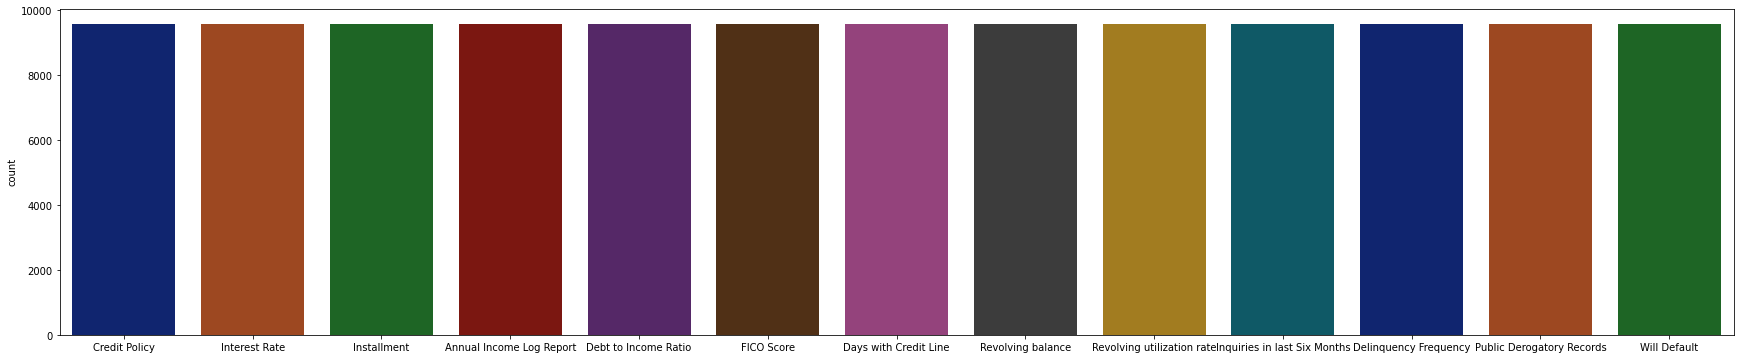

In [8]:
plt.figure(figsize=(30,6))
sns.countplot(data = data, x = data.info(), palette='dark')

In [9]:
from sklearn.preprocessing import LabelEncoder
ft = LabelEncoder()
data_labels = ft.fit_transform(data['Loan Purpose'])
data_mappings = {index: label for index, label in 
                  enumerate(ft.classes_)}
data_mappings

{0: 'all_other',
 1: 'credit_card',
 2: 'debt_consolidation',
 3: 'educational',
 4: 'home_improvement',
 5: 'major_purchase',
 6: 'small_business'}

In [10]:
data['Loan Purpose'] = data_labels
data

,Credit Policy,Loan Purpose,Interest Rate,Installment,Annual Income Log Report,Debt to Income Ratio,FICO Score,Days with Credit Line,Revolving balance,Revolving utilization rate,Inquiries in last Six Months,Delinquency Frequency,Public Derogatory Records,Will Default
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit Policy                 9578 non-null   int64  
 1   Loan Purpose                  9578 non-null   int64  
 2   Interest Rate                 9578 non-null   float64
 3   Installment                   9578 non-null   float64
 4   Annual Income Log Report      9578 non-null   float64
 5   Debt to Income Ratio          9578 non-null   float64
 6   FICO Score                    9578 non-null   int64  
 7   Days with Credit Line         9578 non-null   float64
 8   Revolving balance             9578 non-null   int64  
 9   Revolving utilization rate    9578 non-null   float64
 10  Inquiries in last Six Months  9578 non-null   int64  
 11  Delinquency Frequency         9578 non-null   int64  
 12  Public Derogatory Records     9578 non-null   int64  
 13  Wil

From the above graph, we can see that there are no null values and also see that the data is balanced. 
Now, lets do the EDA, so that we can conclude the data and start preparing for the predictive modelling. 

In [12]:
data['Loan Purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

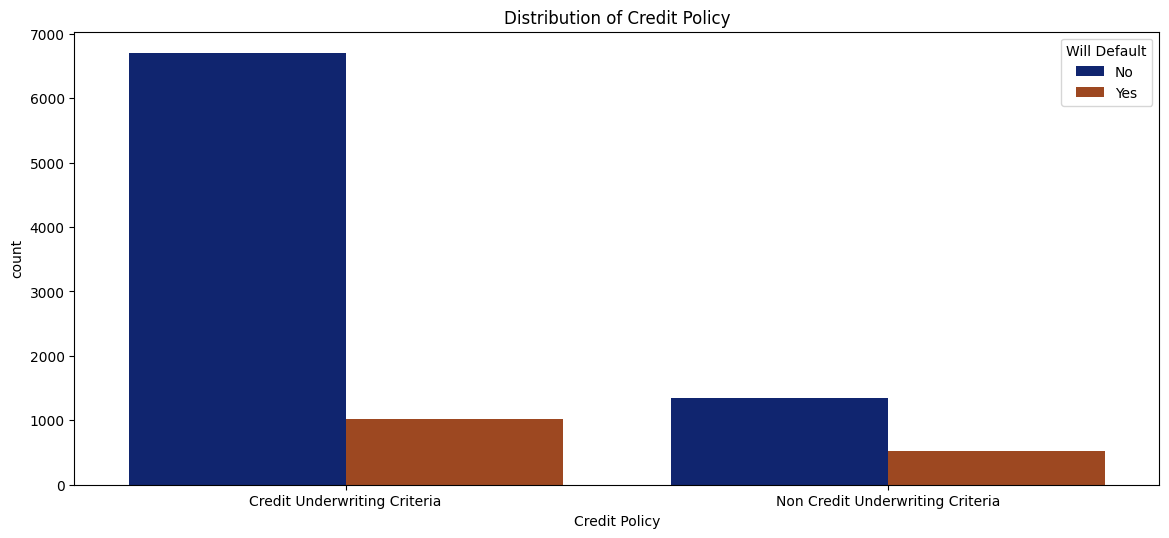

In [13]:
data_policy = data.copy()
data_policy['Credit Policy'] = data_policy['Credit Policy'].map({0: 'Non Credit Underwriting Criteria',
                                                                  1: 'Credit Underwriting Criteria'})
data_policy['Will Default'] = data_policy['Will Default'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(14,6), dpi = 100)
sns.countplot(data = data_policy, x = 'Credit Policy', hue= 'Will Default', palette = 'dark')
plt.title('Distribution of Credit Policy')
plt.show()

In [14]:
data_credit = data.groupby('Credit Policy')

<AxesSubplot:>

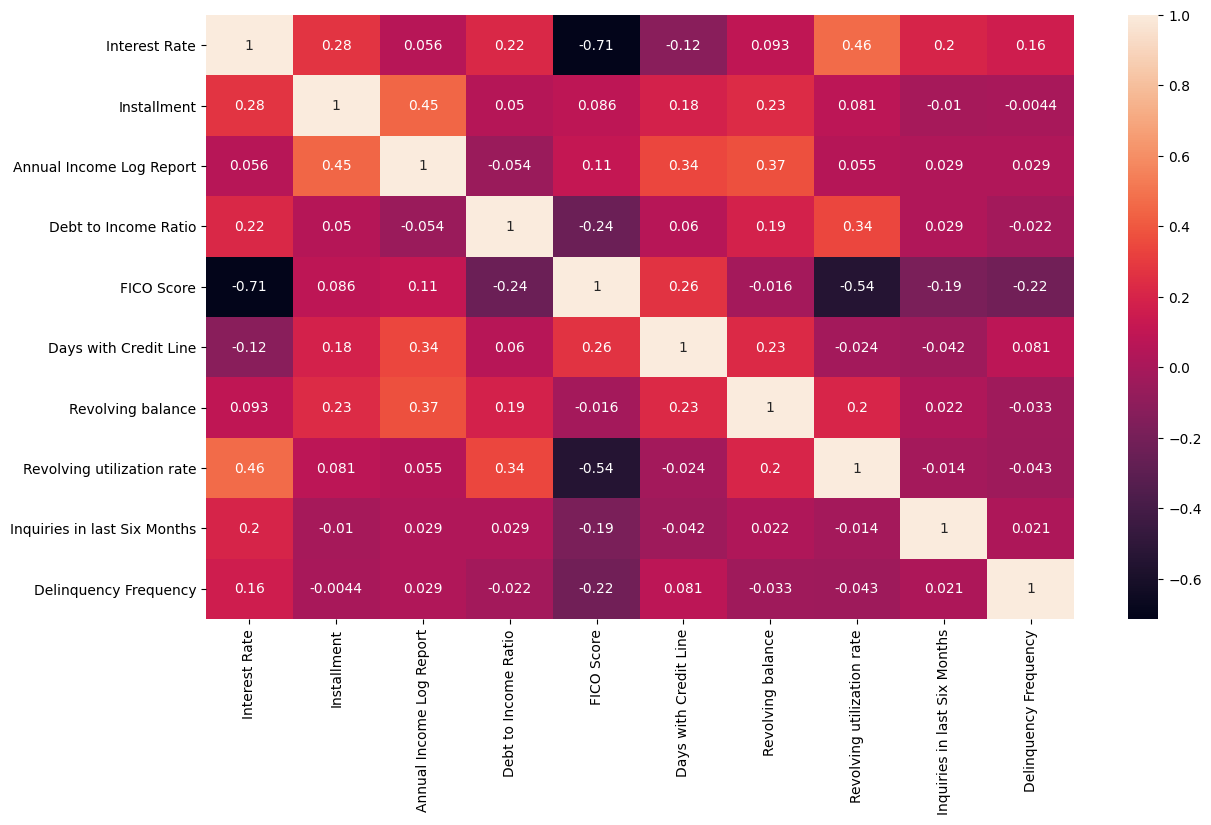

In [15]:
data_corr = data[['Interest Rate', 'Installment', 'Annual Income Log Report', 'Debt to Income Ratio', 
      'FICO Score','Days with Credit Line', 'Revolving balance', 'Revolving utilization rate',
      'Inquiries in last Six Months', 'Delinquency Frequency']].copy()
plt.figure(figsize=(14,8), dpi = 100)
sns.heatmap(data_corr.corr(),annot=True)

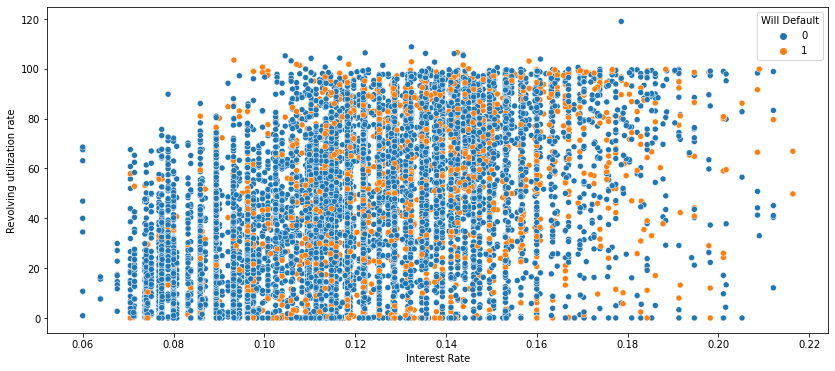

In [16]:
data_scat = data[['Interest Rate', 'Revolving utilization rate', 'Will Default']].copy()
plt.figure(figsize = (14,6))
sns.scatterplot(data = data_scat, x = 'Interest Rate', y = 'Revolving utilization rate', hue = 'Will Default')
plt.show()

In [17]:
X = data.drop('Will Default', axis = 1)
y = data['Will Default'].copy()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25, random_state = 101)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = Sequential()


In [22]:
model.add(Dense(19, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.fit(X_train,y_train,epochs=300,batch_size=256,validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/300
29/29 [==============================] - 2s 20ms/step - loss: 0.6662 - accuracy: 0.8320 - val_loss: 0.5740 - val_accuracy: 0.8472
Epoch 2/300
29/29 [==============================] - 0s 4ms/step - loss: 0.5525 - accuracy: 0.8374 - val_loss: 0.4678 - val_accuracy: 0.8472
Epoch 3/300
29/29 [==============================] - 0s 4ms/step - loss: 0.4597 - accuracy: 0.8426 - val_loss: 0.4251 - val_accuracy: 0.8472
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8330 - val_loss: 0.4195 - val_accuracy: 0.8472
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 0.4378 - accuracy: 0.8374 - val_loss: 0.4156 - val_accuracy: 0.8472
Epoch 6/300
29/29 [==============================] - 0s 7ms/step - loss: 0.4366 - accuracy: 0.8352 - val_loss: 0.4132 - val_accuracy: 0.8472
Epoch 7/300
29/29 [==============================] - 0s 7ms/step - loss: 0.4279 - accuracy: 0.8393 - val_loss: 0.4111 - val_accuracy: 0.8472
Epoch 8/300


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                266       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


In [24]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.845
Loss: 0.403


In [25]:
y_predict = model.predict(X_test)

In [26]:
y_predict[0]

array([0.13249598], dtype=float32)

In [27]:
np.argmax(y_predict[0])

0

In [28]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[2029    0]
 [ 366    0]]


In [29]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2029
           1       0.00      0.00      0.00       366

    accuracy                           0.85      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.72      0.85      0.78      2395



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
